In [1]:
using EnvelopeApproximation
using EnvelopeApproximation.BubbleBasics
using EnvelopeApproximation.BubblesIntegration
using EnvelopeApproximation.StressEnergyTensor
import LinearAlgebra: norm
import Meshes: coordinates
using Plots

Point3 = EnvelopeApproximation.Point3


Point3 (alias for Meshes.Point{3, Float64})

# Setting up the bubbles

In [2]:
R = 2.
d = 2.4
bubbles = Bubbles([Bubble(Point3(0., 0., -d / 2) , R), Bubble(Point3(0., 0., d / 2), R)])
bubbles

Bubbles(Bubble[Bubble(Point(0.0, 0.0, -1.2), 2.0), Bubble(Point(0.0, 0.0, 1.2), 2.0)])

# Setting up the Ks

In [3]:
k_0 = 2π / (R + d / 2)
ks = LinRange(k_0 / 10, k_0 * 10, 1000)
k_vecs = (x -> Point3(0., 0., x)).(ks)
norm(p:: Point3) = norm(coordinates(p), 2)

norm (generic function with 23 methods)

In [4]:
k_0

1.9634954084936207

In [5]:
ks

1000-element LinRange{Float64, Int64}:
 0.19635, 0.215808, 0.235266, 0.254724, …, 19.5766, 19.596, 19.6155, 19.635

# Computing Analytically

comparing $$\tilde{(\partial_i\phi\partial_j\phi)}(k\hat{z})$$

For different i, j

In [8]:
ΔV = 1.
analytic_ii_integral = @. (4 * ΔV / (3 * ks)) * π * R^2 * sin(R * ks + d * ks / 2)

1000-element Vector{Float64}:
 50.15767486229104
 49.45531016706393
 48.69330137174879
 47.873402635005945
 46.99749779530277
 46.06759519057977
 45.0858221420004
 44.0544191183294
 42.97573359842899
 41.852213650250185
  ⋮
 -0.41096408773421805
 -0.3627860208598843
 -0.31329933707875657
 -0.26269815425219095
 -0.21118051461138443
 -0.15894761132980714
 -0.10620300445467072
 -0.05315182924662037
 -2.0900638705448165e-15

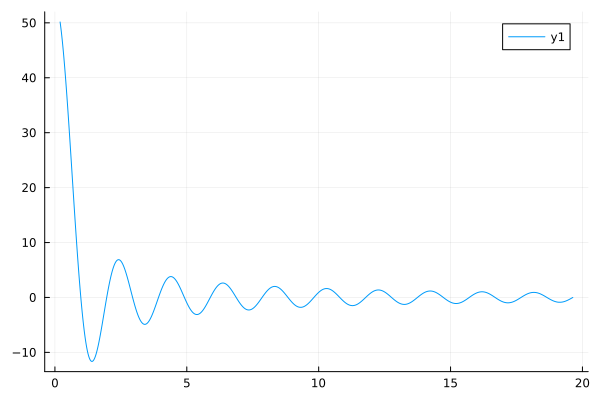

In [9]:
plot(ks, analytic_ii_integral)

# Computing Numerically

In [15]:
tensor_directions = [:trace, (:x, :x), (:y, :y), (:z, :z)]
surface_integral = EnvelopeApproximation.StressEnergyTensor.surface_integral
numerical_T = surface_integral(k_vecs, bubbles, tensor_directions, 100, 100, ΔV; rtol=1e-3)

1000×4 Matrix{ComplexF64}:
      50.1577+1.06642e-15im  …     12.0147+4.37801e-16im
      49.4553-8.53484e-16im        11.6986+5.13912e-16im
      48.6933-4.55365e-17im        11.3565+1.10892e-15im
      47.8734-3.90313e-18im        10.9895+6.33608e-16im
      46.9975+2.59515e-15im        10.5986+5.20417e-18im
      46.0676-3.42608e-17im  …     10.1852+5.63785e-17im
      45.0858-2.0383e-17im         9.75027+1.81712e-16im
      44.0544+1.952e-15im          9.29524+1.19002e-15im
      42.9757-7.1991e-16im         8.82145+2.90566e-17im
      41.8522-4.42354e-17im         8.3303+7.94937e-16im
             ⋮               ⋱  
    -0.410964+3.91614e-15im      -0.345137+1.31319e-15im
    -0.362786+2.17144e-15im      -0.295918+9.39353e-16im
    -0.313299+3.19189e-16im      -0.245552+6.50521e-18im
    -0.262698+4.17635e-16im      -0.194234+3.0748e-16im
    -0.211181+2.53183e-15im  …   -0.142166+8.34185e-16im
    -0.158948+1.66924e-15im     -0.0895496+3.0401e-16im
    -0.106203-9.60386e-16im   

In [16]:
numerical_ii_integral = numerical_T |> x -> x[:, 1] |> real

1000-element Vector{Float64}:
 50.15767486229118
 49.4553101670646
 48.69330137174972
 47.87340263500448
 46.9974977953019
 46.067595190578366
 45.08582214200003
 44.0544191183312
 42.97573359842762
 41.85221365024869
  ⋮
 -0.4109640877407435
 -0.3627860208656921
 -0.31329933708381735
 -0.2626981542564632
 -0.2111805146148515
 -0.1589476113324311
 -0.10620300445644426
 -0.05315182924751621
 -9.581745119557894e-15

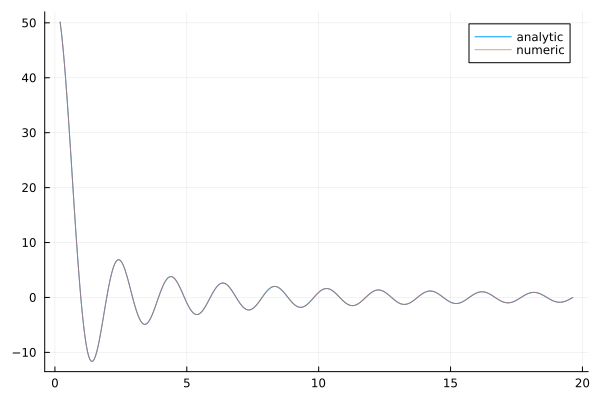

In [17]:
plot(ks, analytic_ii_integral, label="analytic")
plot!(ks, numerical_ii_integral, label="numeric", alpha=0.7)

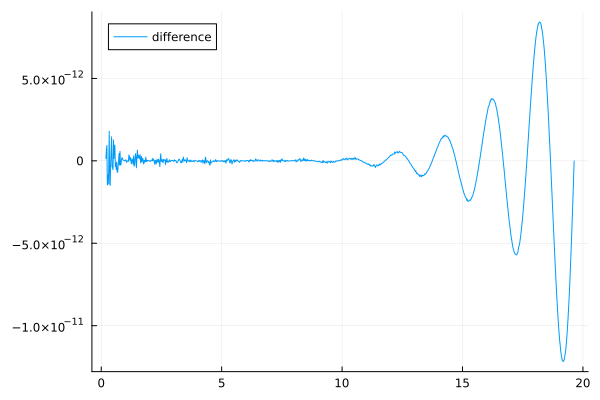

In [18]:
plot(ks, numerical_ii_integral - analytic_ii_integral, label="difference")

# Comparing z, z component

In [19]:
ks

1000-element LinRange{Float64, Int64}:
 0.19635, 0.215808, 0.235266, 0.254724, …, 19.5766, 19.596, 19.6155, 19.635

In [20]:
analytic_zz_integral = @. 4π * ΔV / 3 / ks^3 * (d * ks + (2 * ks * R * cos(ks * R) - (2 - ks ^2 * R ^ 2) * sin(ks * R)) * cos(d * ks / 2) - (2 * ks * R * sin(ks * R) + (2 - ks ^ 2 * R ^ 2) * cos(ks * R)) * sin(ks * d / 2))

1000-element Vector{Float64}:
 12.014711412774016
 11.698567044742866
 11.356480931012376
 10.98947622903871
 10.598649887163068
 10.185169191970578
  9.750268096131444
  9.295243338677393
  8.8214503703372
  8.330299097183236
  ⋮
 -0.34513691933676965
 -0.2959183638802855
 -0.2455517119744028
 -0.19423404513063106
 -0.14216572596095114
 -0.08954961836159708
 -0.0365902995830059
  0.01650673275991794
  0.06953585566980396

In [21]:
numeric_zz_integral = numerical_T |> x -> x[:, 4] |> real

1000-element Vector{Float64}:
 12.01471141277415
 11.69856704474278
 11.356480931012152
 10.989476229038571
 10.598649887162997
 10.185169191971244
  9.750268096131489
  9.295243338677665
  8.821450370337173
  8.33029909718287
  ⋮
 -0.34513691935041246
 -0.29591836389342213
 -0.24555171198697912
 -0.19423404514260328
 -0.14216572597225915
 -0.08954961837221216
 -0.03659029959289175
  0.016506732750811073
  0.06953585566150207

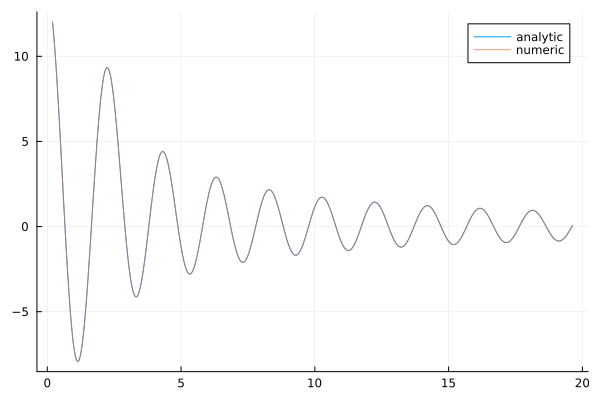

In [22]:
plot(ks, analytic_zz_integral, label="analytic")
plot!(ks, numeric_zz_integral, label="numeric", alpha=0.7)

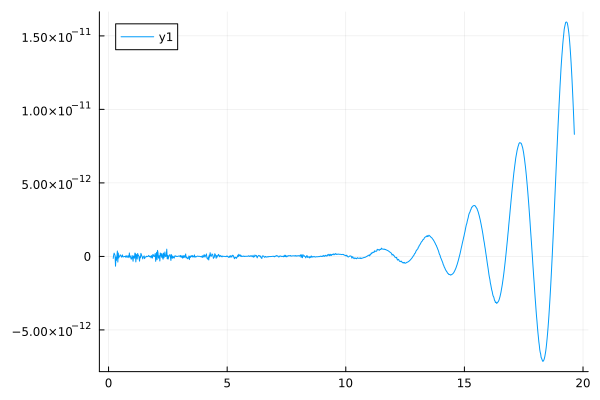

In [23]:
plot(ks, analytic_zz_integral - numeric_zz_integral)

# comparing xx integral

In [24]:
analytic_xx_integral = @. -2π * ΔV / (3 * ks ^ 3) * (d * ks + 2 * (ks * R * cos(ks * R) - sin(ks * R)) * cos(d * ks / 2) - 2 * (ks * R * sin(ks * R) + cos(ks * R)) * sin(d * ks / 2))

1000-element Vector{Float64}:
 19.071481724758524
 18.87837156116055
 18.66841022036821
 18.441963202983615
 18.199423954069854
 17.94121299930461
 17.667777022934473
 17.379587889826002
 17.077141614045892
 16.76095727653346
  ⋮
 -0.03291358419872146
 -0.03343382848979387
 -0.03387381255217544
 -0.034232054560779934
 -0.03450739432521368
 -0.03469899648410203
 -0.03480635243583091
 -0.034829281003267626
 -0.034767927834901506

In [25]:
numeric_xx_integral = numerical_T |> x -> x[:, 2] |> real

1000-element Vector{Float64}:
 19.071481724758485
 18.878371561160453
 18.668410220368223
 18.44196320298346
 18.19942395406985
 17.94121299930458
 17.667777022934345
 17.3795878898258
 17.07714161404588
 16.76095727653335
  ⋮
 -0.03291358419516186
 -0.03343382848613127
 -0.03387381254842042
 -0.03423205455693628
 -0.034507394321292115
 -0.034698996480110746
 -0.034806352431777626
 -0.034829280999163124
 -0.034767927830755566

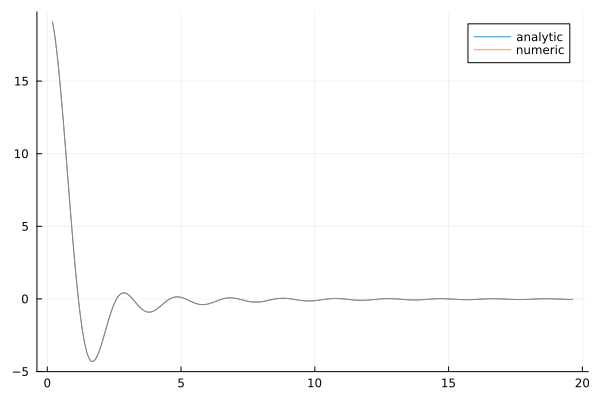

In [26]:
plot(ks, analytic_xx_integral, label="analytic")
plot!(ks, numeric_xx_integral, label="numeric", alpha=0.7)

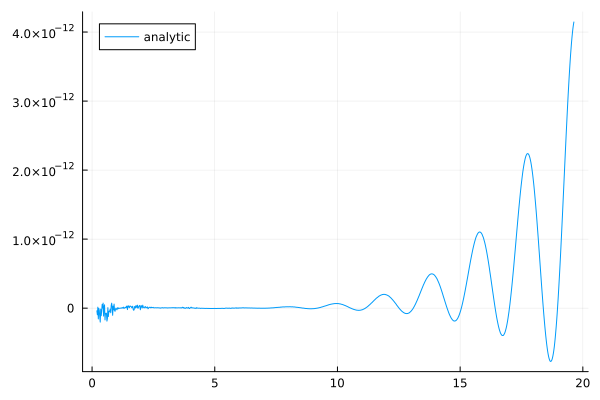

In [27]:
plot(ks, numeric_xx_integral - analytic_xx_integral, label="analytic")

# Comparing xx and yy

In [28]:
numeric_yy_integral = numerical_T |> x -> x[:, 3] |> real

1000-element Vector{Float64}:
 19.071481724758403
 18.87837156116047
 18.66841022036823
 18.441963202983636
 18.199423954069843
 17.941212999304703
 17.667777022934356
 17.379587889825824
 17.07714161404564
 16.760957276533365
  ⋮
 -0.032913584195161986
 -0.03343382848613146
 -0.033873812548420416
 -0.03423205455693612
 -0.03450739432129226
 -0.03469899648011053
 -0.034806352431777654
 -0.034829280999163305
 -0.03476792783075561

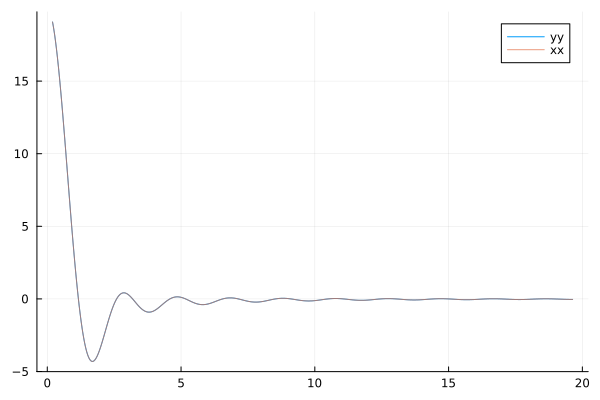

In [29]:
plot(ks, numeric_yy_integral, label="yy")
plot!(ks, numeric_xx_integral, label="xx", alpha=0.7)

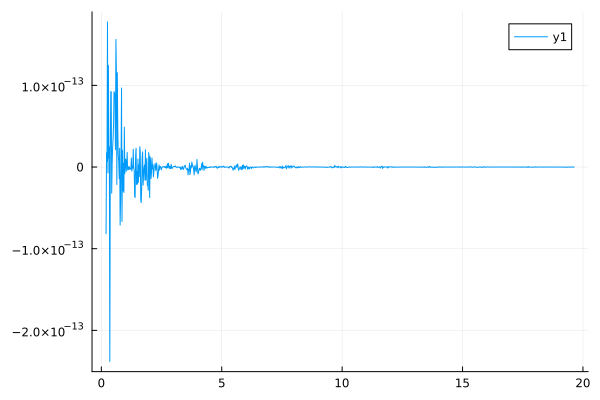

In [30]:
plot(ks, numeric_yy_integral - numeric_xx_integral)

# Volume Integration

## numerical computation

In [31]:
import EnvelopeApproximation.StressEnergyTensor: potential_integral
n_ϕ = n_μ = 50
ΔV = 1.
numeric_integral = potential_integral(k_vecs, bubbles, n_ϕ, n_μ, ΔV, rtol=1e-2) .|> real

1000-element Vector{Float64}:
 -57.21444517427602
 -56.635114683482186
 -56.00523066110518
 -55.32588960895123
 -54.598271862208875
 -53.82363899791349
 -53.00333106880322
 -52.13876366947837
 -51.23142484213716
 -50.28287182959981
   ⋮
   0.09874075299650711
   0.10030148588331285
   0.10162143808325537
   0.10269616412101706
   0.10352218342536583
   0.10409698991212257
   0.10441905777640619
   0.10448784348676404
   0.10430378398863316

## Analytical computation

In [32]:
function single_bubble_contribution(k)
    return (-ΔV) * 8 * π * cos(k * d / 2) * (sin(k * R) - (k * R) * cos(k * R)) / (k ^ 3)
end

single_bubble_contribution (generic function with 1 method)

In [33]:
function intersection_contribution(k)
    res = (π*d*k - 2*(π*R*k*cos(R*k) - π*sin(R*k))*cos(1/2*d*k) - 2*(π*R*k*sin(R*k) + π*cos(R*k))*sin(1/2*d*k))/k^3
    return 2 * (-ΔV) * real(res)
end

intersection_contribution (generic function with 1 method)

In [34]:
analytic_volume_integral = @. single_bubble_contribution(ks) - intersection_contribution(ks)

1000-element Vector{Float64}:
 -57.21444517427557
 -56.63511468348162
 -56.00523066110464
 -55.32588960895085
 -54.59827186220958
 -53.82363899791381
 -53.00333106880342
 -52.138763669477996
 -51.23142484213767
 -50.28287182960035
   ⋮
   0.0987407525961645
   0.10030148546938163
   0.10162143765652634
   0.10269616368233975
   0.10352218297564103
   0.10409698945230605
   0.10441905730749268
   0.1044878430098029
   0.10430378350470453

## Comparison

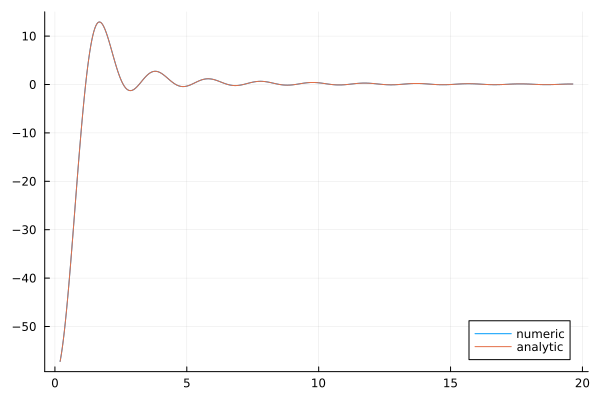

In [35]:
plot(ks, numeric_integral, label="numeric")
plot!(ks, analytic_volume_integral, label="analytic")

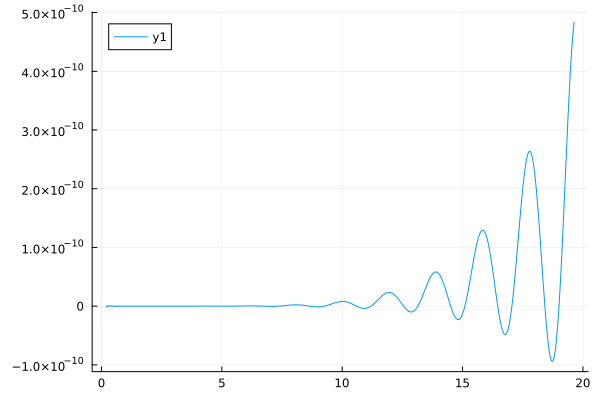

In [36]:
plot(ks, numeric_integral - analytic_volume_integral)

# Computing $T_{\mu\nu}$ and saving the data

In [37]:
tensor_directions

4-element Vector{Any}:
 :trace
 (:x, :x)
 (:y, :y)
 (:z, :z)

In [38]:
numerical_T

1000×4 Matrix{ComplexF64}:
      50.1577+1.06642e-15im  …     12.0147+4.37801e-16im
      49.4553-8.53484e-16im        11.6986+5.13912e-16im
      48.6933-4.55365e-17im        11.3565+1.10892e-15im
      47.8734-3.90313e-18im        10.9895+6.33608e-16im
      46.9975+2.59515e-15im        10.5986+5.20417e-18im
      46.0676-3.42608e-17im  …     10.1852+5.63785e-17im
      45.0858-2.0383e-17im         9.75027+1.81712e-16im
      44.0544+1.952e-15im          9.29524+1.19002e-15im
      42.9757-7.1991e-16im         8.82145+2.90566e-17im
      41.8522-4.42354e-17im         8.3303+7.94937e-16im
             ⋮               ⋱  
    -0.410964+3.91614e-15im      -0.345137+1.31319e-15im
    -0.362786+2.17144e-15im      -0.295918+9.39353e-16im
    -0.313299+3.19189e-16im      -0.245552+6.50521e-18im
    -0.262698+4.17635e-16im      -0.194234+3.0748e-16im
    -0.211181+2.53183e-15im  …   -0.142166+8.34185e-16im
    -0.158948+1.66924e-15im     -0.0895496+3.0401e-16im
    -0.106203-9.60386e-16im   

In [39]:
numerical_Tij = Dict("T_xx" => numeric_xx_integral - numeric_integral, "T_yy" => numeric_yy_integral - numeric_integral, "T_zz" => numeric_zz_integral - numeric_integral)
analytic_Tij = Dict("T_xx" => analytic_xx_integral - analytic_volume_integral, 
                    "T_yy" => analytic_xx_integral - analytic_volume_integral, 
                    "T_zz" => analytic_zz_integral - analytic_volume_integral)

Dict{String, Vector{Float64}} with 3 entries:
  "T_zz" => [69.2292, 68.3337, 67.3617, 66.3154, 65.1969, 64.0088, 62.7536, 61.…
  "T_xx" => [76.2859, 75.5135, 74.6736, 73.7679, 72.7977, 71.7649, 70.6711, 69.…
  "T_yy" => [76.2859, 75.5135, 74.6736, 73.7679, 72.7977, 71.7649, 70.6711, 69.…

In [40]:
import Meshes: coordinates
k_vecs .|> coordinates .|> collect

1000-element Vector{Vector{Float64}}:
 [0.0, 0.0, 0.19634954084936207]
 [0.0, 0.0, 0.21580760345605562]
 [0.0, 0.0, 0.23526566606274915]
 [0.0, 0.0, 0.2547237286694427]
 [0.0, 0.0, 0.27418179127613623]
 [0.0, 0.0, 0.29363985388282976]
 [0.0, 0.0, 0.31309791648952334]
 [0.0, 0.0, 0.33255597909621687]
 [0.0, 0.0, 0.3520140417029104]
 [0.0, 0.0, 0.3714721043096039]
 ⋮
 [0.0, 0.0, 19.47928958408266]
 [0.0, 0.0, 19.498747646689356]
 [0.0, 0.0, 19.518205709296048]
 [0.0, 0.0, 19.53766377190274]
 [0.0, 0.0, 19.557121834509434]
 [0.0, 0.0, 19.576579897116126]
 [0.0, 0.0, 19.59603795972282]
 [0.0, 0.0, 19.615496022329516]
 [0.0, 0.0, 19.634954084936208]

In [41]:
complete_data = Dict("numerical_T" => numerical_Tij, 
                     "analytical_T" => analytic_Tij, 
                     "R" => R, 
                     "d" => d, 
                     "ΔV" => ΔV, 
                     "ks" => k_vecs .|> coordinates .|> collect)

Dict{String, Any} with 6 entries:
  "ks"           => [[0.0, 0.0, 0.19635], [0.0, 0.0, 0.215808], [0.0, 0.0, 0.23…
  "analytical_T" => Dict("T_zz"=>[69.2292, 68.3337, 67.3617, 66.3154, 65.1969, …
  "numerical_T"  => Dict("T_zz"=>[69.2292, 68.3337, 67.3617, 66.3154, 65.1969, …
  "R"            => 2.0
  "ΔV"           => 1.0
  "d"            => 2.4

In [42]:
using JSON
open("double_bubble_benchmark_data.json", "w") do f
    JSON.print(f, complete_data)
end